In [6]:
import numpy as np
import glob
from sklearn import preprocessing
import matplotlib.pyplot as plt
from tqdm import tqdm

In [7]:
###get data
paths = glob.glob('/work/users/mi186veva/data_1d/raw/*.npz')
print(len(paths))
X, y = [], []

for path in tqdm(paths):
    data = np.load(path)
    X_, y_ = data['X'], data['y']
    
    X += list(X_)
    y += list(y_)

X, y = np.array(X)[..., :-1], np.array(y)
print(X.shape, y.shape)

  0%|          | 0/56 [00:00<?, ?it/s]

56


100%|██████████| 56/56 [00:13<00:00,  4.13it/s]


(5791157, 91) (5791157,)


In [8]:
###scale

scaler_l2 = preprocessing.Normalizer().fit(X)
scaler_svn = preprocessing.StandardScaler().fit(X)
scaler_svn_t = preprocessing.StandardScaler().fit(X.T)

In [9]:
###transform
X_ = X[::10000]
X_l2, X_svn = scaler_l2.transform(X_), scaler_svn.transform(X)[::10000]

X_t = scaler_svn_t.transform(X.T).T[::10000]

In [10]:
y_ = y[::10000]
ill = y_ == 1
healthy = y_ == 0

Raw results


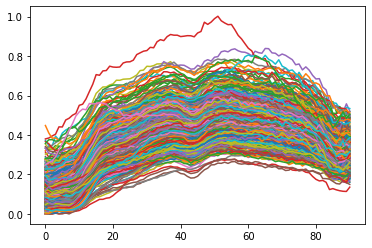

l2 results


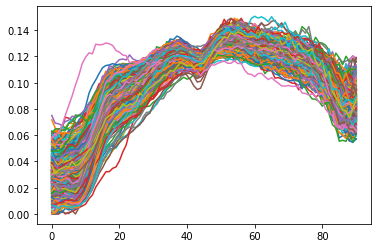

svn results


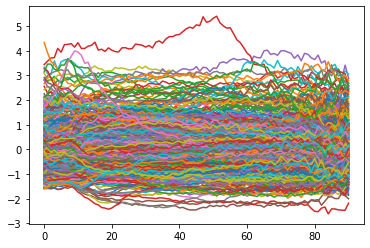

svn T results


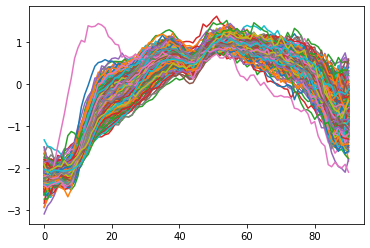

In [11]:
# The most important part here!

print('Raw results')
plt.plot(X_.T)
#plt.plot(X_[ill].T, c='r')
#plt.plot(X_[healthy].T, c='b')
plt.show()

print('l2 results')
plt.plot(X_l2.T)
#plt.plot(X_l2[ill].T, c='r')
#plt.plot(X_l2[healthy].T, c='b')
plt.show()

print('svn results')
plt.plot(X_svn.T)
#plt.plot(X_svn[ill].T, c='r')
#plt.plot(X_svn[healthy].T, c='b')
plt.show()

print('svn T results')
plt.plot(X_t.T)
#plt.plot(X_t[ill].T, c='r')
#plt.plot(X_t[healthy].T, c='b')
plt.show()


/work/users/mi186veva/data_3d/l2_norm/*.npz
/work/users/mi186veva/data_3d/l2_norm/2019_07_15_11_33_28_.npz


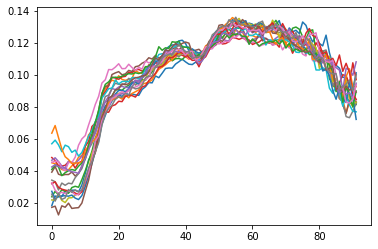

/work/users/mi186veva/data_3d/svn/*.npz
/work/users/mi186veva/data_3d/svn/2019_07_15_11_33_28_.npz


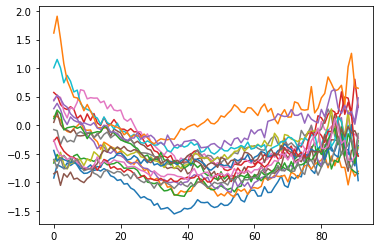

/work/users/mi186veva/data_3d/svn_T/*.npz
/work/users/mi186veva/data_3d/svn_T/2019_07_15_11_33_28_.npz


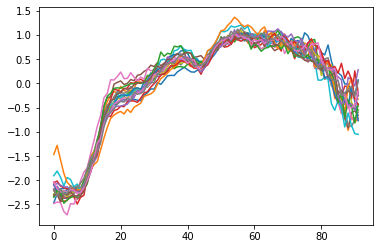

FileNotFoundError: [Errno 2] No such file or directory: '/work/users/mi186veva/data_3d/3d_svn_T/2019_07_15_11_33_28_.npz'

In [5]:
#Check .npz archives
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os

for folder in ['l2_norm', 'svn', 'svn_T']:
    print(os.path.join('/work/users/mi186veva/data_3d/', folder, '*.npz'))
    path = sorted(glob(os.path.join('/work/users/mi186veva/data_3d/', folder, '*.npz')))[1]
    print(path)
    X = np.load(path)['X'][:, 2, 2, ...][::1000]
    
    plt.plot(X.T)
    plt.show()
    

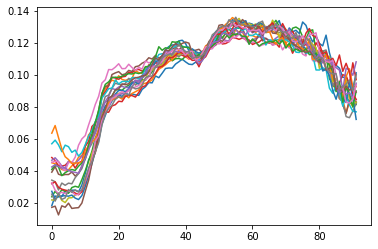

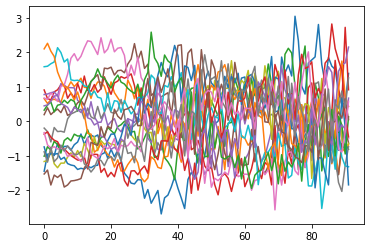

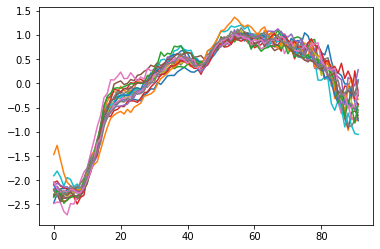

In [18]:
#play with l2_norm
from sklearn import preprocessing

X_l2 = np.load('/work/users/mi186veva/data_3d/3d_l2_norm/2019_07_15_11_33_28_.npz')["X"][::1000, 2, 2, :]
plt.plot(X_l2.T)
plt.show()

X_l2_svn = preprocessing.StandardScaler().fit_transform(X_l2)
plt.plot(X_l2_svn.T)
plt.show()

X_l2_svn_T = preprocessing.StandardScaler().fit_transform(X_l2.T)
plt.plot(X_l2_svn_T)
plt.show()

/software/jupyterlab/opt/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


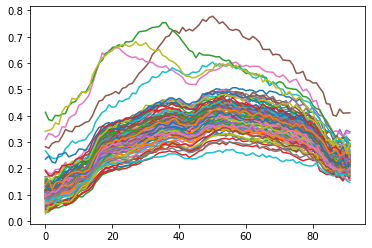

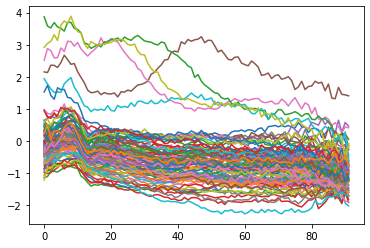

In [7]:
#play with raw
import pickle 

raw = np.load('/work/users/mi186veva/data_3d/3d_raw/2020_03_27_16_57_07_.npz')['X'][:, 2, 2, :]
scaler = pickle.load(open('/work/users/mi186veva/data_3d/3d_svn/scaler.scaler', 'rb'))

#X_ = scaler.fit_transform(raw.T).T
X_ = scaler.transform(raw)

plt.plot(raw[::1000].T)
plt.show()

plt.plot(X_[::1000].T)
plt.show()